In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from gensim.models import word2vec
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


PCA (Principal Component Analysis) - линейный метод уменьшения размерности данных. Он использует линейные комбинации исходных признаков для создания новых признаков (главных компонент), которые объясняют максимальное количество дисперсии в данных.

t-SNE (t-Distributed Stochastic Neighbor Embedding) - это нелинейный метод уменьшения размерности данных. Он стремится сохранить локальные структуры данных, представленные в виде соседних точек в исходном пространстве, в низкоразмерном пространстве. В отличие от PCA, t-SNE пытается сохранить не только глобальную структуру данных, но и локальные отношения между близкими точками, что делает его особенно полезным для визуализации сложных структур данных.

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Алгоритмы ХИИ/cleaned_dataset.csv')
data

,gap,MolWt,NumValenceElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,...,SRW09,SRW10,TSRW10,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,-0.988977,-0.374697,-1.221278,0.208722,NaN,-1.113899,0.222836,NaN,-0.179338,0.193855,...,0.686634,-0.490566,0.626532,1.832664,1.753173,NaN,-0.587386,NaN,NaN,1.319191
1,-0.579700,-0.654523,0.014112,-0.259228,-0.187404,0.173694,NaN,0.405434,-0.513867,-1.311073,...,-1.400617,-1.268212,-1.558783,-0.590606,-1.089393,-0.186698,-1.662296,-1.411004,1.515295,0.496918
2,0.349252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.712755,-0.369041,-0.603583,-0.353128,0.139589,-0.155723,NaN,0.000792,-0.179338,-0.756626,...,0.822027,0.227255,0.869564,NaN,0.556303,1.033803,-0.157422,NaN,0.869118,1.387713
4,-1.023981,-0.089073,-0.603583,0.124190,NaN,0.232246,0.135285,0.540315,0.266701,-0.122972,...,0.447283,-0.479488,0.116030,0.839529,0.182281,1.033803,-0.372404,-0.381638,0.762785,0.633963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16227,1.078950,0.758748,0.631807,1.607094,NaN,0.743857,NaN,0.540315,0.712740,0.193855,...,NaN,0.342934,0.524283,0.291221,-0.640567,0.423553,0.702506,NaN,-0.177854,-0.873537
16228,-1.018596,0.334555,0.014112,-0.368896,0.909729,-0.931570,-0.375408,-0.538731,NaN,-0.122972,...,0.935028,NaN,1.145137,NaN,0.481498,-0.186698,0.702506,0.768829,-0.177854,0.291350
16229,1.388601,-1.927668,-1.838973,-0.704036,-0.067125,0.052523,-0.722514,0.405434,-0.012073,0.114648,...,-1.400617,-2.044859,-1.700834,0.053795,-0.191741,-2.017448,-1.877278,-1.713758,0.795502,0.359872
16230,0.023446,-1.363208,NaN,0.519178,1.065316,-1.088310,0.544378,0.405434,-0.513867,-1.311073,...,-1.400617,-1.268212,-1.558783,0.295810,NaN,-0.186698,NaN,-1.411004,1.515295,0.496918


In [4]:
import pandas as pd

# Замена всех значений NaN на 0
df = data.fillna(0)
df

,gap,MolWt,NumValenceElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,...,SRW09,SRW10,TSRW10,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,-0.988977,-0.374697,-1.221278,0.208722,0.000000,-1.113899,0.222836,0.000000,-0.179338,0.193855,...,0.686634,-0.490566,0.626532,1.832664,1.753173,0.000000,-0.587386,0.000000,0.000000,1.319191
1,-0.579700,-0.654523,0.014112,-0.259228,-0.187404,0.173694,0.000000,0.405434,-0.513867,-1.311073,...,-1.400617,-1.268212,-1.558783,-0.590606,-1.089393,-0.186698,-1.662296,-1.411004,1.515295,0.496918
2,0.349252,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.712755,-0.369041,-0.603583,-0.353128,0.139589,-0.155723,0.000000,0.000792,-0.179338,-0.756626,...,0.822027,0.227255,0.869564,0.000000,0.556303,1.033803,-0.157422,0.000000,0.869118,1.387713
4,-1.023981,-0.089073,-0.603583,0.124190,0.000000,0.232246,0.135285,0.540315,0.266701,-0.122972,...,0.447283,-0.479488,0.116030,0.839529,0.182281,1.033803,-0.372404,-0.381638,0.762785,0.633963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16227,1.078950,0.758748,0.631807,1.607094,0.000000,0.743857,0.000000,0.540315,0.712740,0.193855,...,0.000000,0.342934,0.524283,0.291221,-0.640567,0.423553,0.702506,0.000000,-0.177854,-0.873537
16228,-1.018596,0.334555,0.014112,-0.368896,0.909729,-0.931570,-0.375408,-0.538731,0.000000,-0.122972,...,0.935028,0.000000,1.145137,0.000000,0.481498,-0.186698,0.702506,0.768829,-0.177854,0.291350
16229,1.388601,-1.927668,-1.838973,-0.704036,-0.067125,0.052523,-0.722514,0.405434,-0.012073,0.114648,...,-1.400617,-2.044859,-1.700834,0.053795,-0.191741,-2.017448,-1.877278,-1.713758,0.795502,0.359872
16230,0.023446,-1.363208,0.000000,0.519178,1.065316,-1.088310,0.544378,0.405434,-0.513867,-1.311073,...,-1.400617,-1.268212,-1.558783,0.295810,0.000000,-0.186698,0.000000,-1.411004,1.515295,0.496918


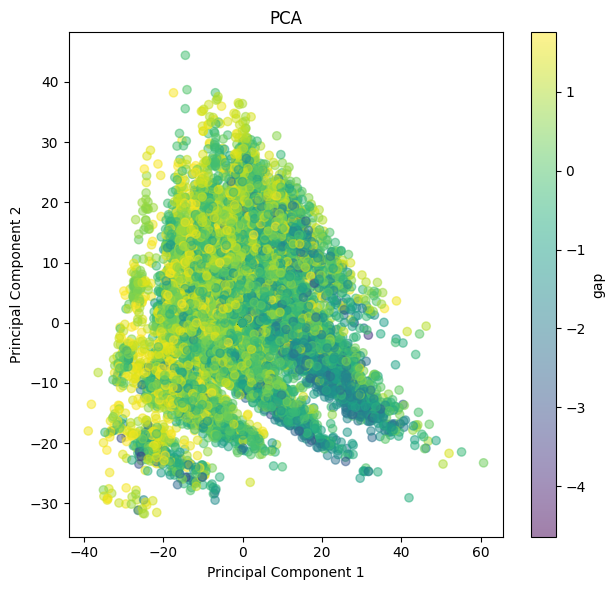

In [28]:
import matplotlib.pyplot as plt
import numpy as np

y = df['gap'].values
X = df.drop(columns=['gap'])

# Применение PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Создаем новое окно графика
plt.figure(figsize=(12, 6))

# График PCA
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.title('PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='gap')

# Показываем график
plt.tight_layout()
plt.show()


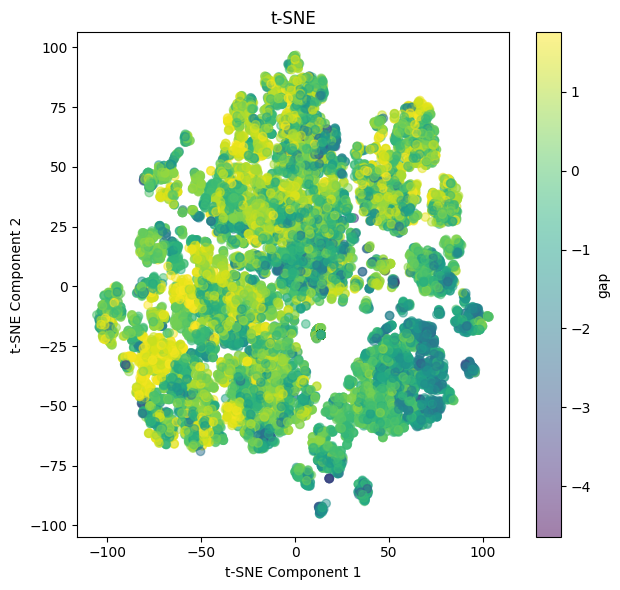

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Получение значения из столбца 'gap' как целевой переменной y
y = df['gap'].values

# Применение t-SNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

# Создаем новое окно графика
plt.figure(figsize=(12, 6))

# График для t-SNE
plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.title('t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='gap')

# Показываем графики
plt.tight_layout()
plt.show()


Justify the choice of the number of components / dimensions and explain them: our target column is 'gap' from dataset, so it's y. And other descriptors I put in the x, to simplify the dimensionality.